<a href="https://colab.research.google.com/github/Patilpankajsudhakar/GroupNo4--Topic4/blob/main/MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline
from datetime import datetime

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
np.random.seed(19680801)

In [70]:
#data=pd.read_csv("/content/drive/MyDrive/MSCPROJ/newdatasetmumbai.csv")
data=pd.read_csv("/content/drive/MyDrive/MSCPROJ/Newdatasetmumbai.csv")

In [71]:
data.head()

,City,Station,Date,FromDate,ToDate,PM2.5,PM10,NO,NO2,NH3,...,I6(SO2),I7(CO),I1(PM2.5).1,I2(PM10).1,I3(NO).1,I4(NO2).1,I5(NH3).1,I6(SO2).1,I7(CO).1,AQI
0,Mumbai-01,"BandraKurlaComplex,Mumbai-IITM",10/11/2020,10-11-202000:00,11-11-202000:00,28.85,289.36,70.61,58.47,174.30,...,149.533333,3.01,0,1,1,1,1,1,1,239.36
1,Mumbai-01,"BandraKurlaComplex,Mumbai-IITM",11/11/2020,11-11-202000:00,12-11-202000:00,90.91,266.66,59.70,51.01,153.50,...,135.666667,3.24,0,1,1,1,1,1,1,216.66
2,Mumbai-01,"BandraKurlaComplex,Mumbai-IITM",12/11/2020,12-11-202000:00,13-11-202000:00,26.19,237.63,76.37,92.88,157.16,...,138.106667,8.28,0,1,1,1,1,1,1,191.75
3,Mumbai-01,"BandraKurlaComplex,Mumbai-IITM",13/11/2020,13-11-202000:00,14-11-202000:00,27.24,243.11,86.95,45.14,185.24,...,156.826667,3.26,0,1,1,1,1,1,1,195.41
4,Mumbai-01,"BandraKurlaComplex,Mumbai-IITM",14/11/2020,14-11-202000:00,15-11-202000:00,27.93,180.92,62.56,68.73,131.72,...,121.146667,7.24,0,1,1,1,1,1,1,153.95


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10034 entries, 0 to 10033
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         10034 non-null  object 
 1   Station      10034 non-null  object 
 2   Date         10034 non-null  object 
 3   FromDate     10034 non-null  object 
 4   ToDate       10034 non-null  object 
 5   PM2.5        10034 non-null  float64
 6   PM10         9438 non-null   float64
 7   NO           9849 non-null   float64
 8   NO2          9873 non-null   float64
 9   NH3          8659 non-null   float64
 10  SO2          9260 non-null   float64
 11  CO           9850 non-null   float64
 12  Benzene      8955 non-null   float64
 13  Ozone        7221 non-null   float64
 14  CH4          334 non-null    float64
 15  CO2          2594 non-null   float64
 16  I1(PM2.5)    10034 non-null  int64  
 17  I2(PM10)     10034 non-null  float64
 18  I3(NO)       10034 non-null  float64
 19  I4(N

In [73]:
pd.isnull(data["PM2.5"]).sum()

0

In [81]:
pd.isnull(data["PM10"]).sum()

1375

In [82]:
data['PM10']=data['PM10'].fillna(data['PM10'].median())
data['PM2.5']=data['PM2.5'].fillna(data['PM2.5'].median())
data['NO']=data['NO'].fillna(data['NO'].median())
data['NO2']=data['NO2'].fillna(data['NO2'].median())
data['SO2']=data['SO2'].fillna(data['SO2'].median())
data['CO']=data['CO'].fillna(data['CO'].median())
data['NH3']=data['NH3'].fillna(data['NH3'].median())

In [76]:
pd.isnull(data["AQI"]).sum()

0

In [83]:
data.count()

City           10034
Station        10034
Date           10034
FromDate       10034
ToDate         10034
PM2.5          10034
PM10           10034
NO             10034
NO2            10034
NH3            10034
SO2            10034
CO             10034
Benzene         8955
Ozone           7221
CH4              334
CO2             2594
I1(PM2.5)      10034
I2(PM10)       10034
I3(NO)         10034
I4(NO2)        10034
I5(NH3)        10034
I6(SO2)        10034
I7(CO)         10034
I1(PM2.5).1    10034
I2(PM10).1     10034
I3(NO).1       10034
I4(NO2).1      10034
I5(NH3).1      10034
I6(SO2).1      10034
I7(CO).1       10034
AQI            10034
dtype: int64

In [89]:
x = data.iloc[:,5:12]
y = data['AQI']

In [95]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [110]:
#shapes of splitted data
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (8027, 7)
X_test: (2007, 7)
Y_train: (8027,)
Y_test: (2007,)


In [121]:
linreg=LinearRegression()
model=linreg.fit(x_train,y_train)

In [142]:
y_predtrain=model.predict(x_train)

In [152]:
df=pd.DataFrame()
df['Actual Value']=y_train
df['Predicted Value']=y_predtrain

In [123]:
y_pred=model.predict(x_test)
y_pred

array([ 34.76264254,  37.23533566, 204.07892939, ...,  57.40994137,
        25.03509261, 165.81357148])

In [125]:
model.coef_

array([0.20520652, 0.62815723, 0.30755789, 0.0039949 , 0.17788736,
       0.07503732, 0.03729359])

In [126]:
model.intercept_

8.657893027937007

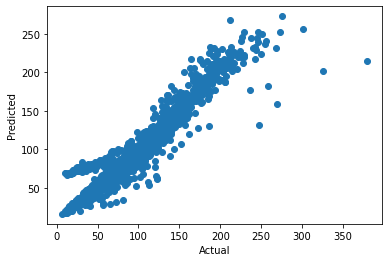

In [161]:
plt.scatter(y_test,y_pred,cmap='gray');
plt.xlabel('Actual');
plt.ylabel('Predicted');

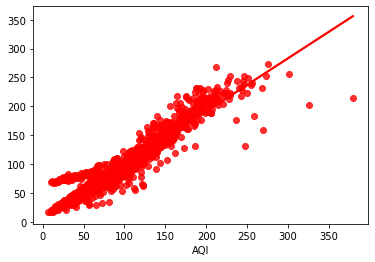

In [137]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [129]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})

In [130]:
pred_df

,Actual Value,Predicted Value,Difference
4456,31.56,34.762643,-3.202643
4561,33.10,37.235336,-4.135336
4100,196.09,204.078929,-7.988929
1312,50.03,46.938454,3.091546
1941,110.50,91.633815,18.866185
...,...,...,...
4313,113.45,104.861140,8.588860
2140,66.85,64.766410,2.083590
7586,60.15,57.409941,2.740059
7565,15.16,25.035093,-9.875093


In [158]:
pred_df.to_csv("Actual vs predicted value for MLR.csv")

In [131]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [160]:
Accuracy=r2_score(y_train,y_predtrain)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 91.12


In [133]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 91.36


In [159]:
mape = np.mean(np.abs(y_predtrain - y_train) /np.abs(y_train)) # Mean absolute percentage error -
mae = np.mean(np.abs(y_predtrain  - y_train)) # Mean absolute error
mpe = np.mean((y_predtrain  - y_train)/y_train) # Mean percentage error
rmse = np.mean((y_predtrain  -y_train)**2)**.5 # RMSE
corr = np.corrcoef (y_predtrain ,y_train) [0,1]

# Correlation Coefficient
mins = np.amin(np.hstack([y_predtrain [:,None], y_train[:,None]]), axis=1)
maxs = np.amax(np.hstack([y_predtrain [:,None], y_train[:,None]]), axis=1)
minmax = 1 - np.mean(mins/maxs)   # minmax

import pprint
pprint.pprint({'mape':mape,'mae':mae,'mpe':mpe,'rmse':rmse,'corr':corr,'minmax' :minmax})

{'corr': 0.9545469538199954,
 'mae': 10.57036815787514,
 'mape': 0.18752217143490454,
 'minmax': 0.12305653946585915,
 'mpe': 0.08734185303230155,
 'rmse': 16.467525332742408}


In [155]:
mape = np.mean(np.abs(y_pred - y_test) /np.abs(y_test)) # Mean absolute percentage error -
mae = np.mean(np.abs(y_pred - y_test)) # Mean absolute error
mpe = np.mean((y_pred - y_test)/y_test) # Mean percentage error
rmse = np.mean((y_pred - y_test)**2)**.5 # RMSE
corr = np.corrcoef (y_pred, y_test) [0,1]

# Correlation Coefficient
mins = np.amin(np.hstack([y_pred[:,None], y_test[:,None]]), axis=1)
maxs = np.amax(np.hstack([y_pred[:,None], y_test[:,None]]), axis=1)
minmax = 1 - np.mean(mins/maxs)   # minmax

import pprint
pprint.pprint({'mape':mape,'mae':mae,'mpe':mpe,'rmse':rmse,'corr':corr,'minmax' :minmax})

{'corr': 0.9558509961254353,
 'mae': 9.9999522646039,
 'mape': 0.1718842383240076,
 'minmax': 0.11759139588831047,
 'mpe': 0.07183023340503027,
 'rmse': 15.455997836213637}
